In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Step 1. Read Data

In [22]:
df = pd.read_csv('E:\Project\KStyle\Solution_3a\cleaned_data.csv')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,1,3,1,1,2,2,1,4,1,1,87,93,91
1,1,2,4,1,1,1,2,1,0,1,0,76,78,75
2,0,1,4,1,0,3,0,0,1,0,0,85,93,89
3,1,1,4,0,1,1,2,1,1,0,2,41,43,39
4,1,3,2,0,0,2,2,0,3,0,2,65,64,68


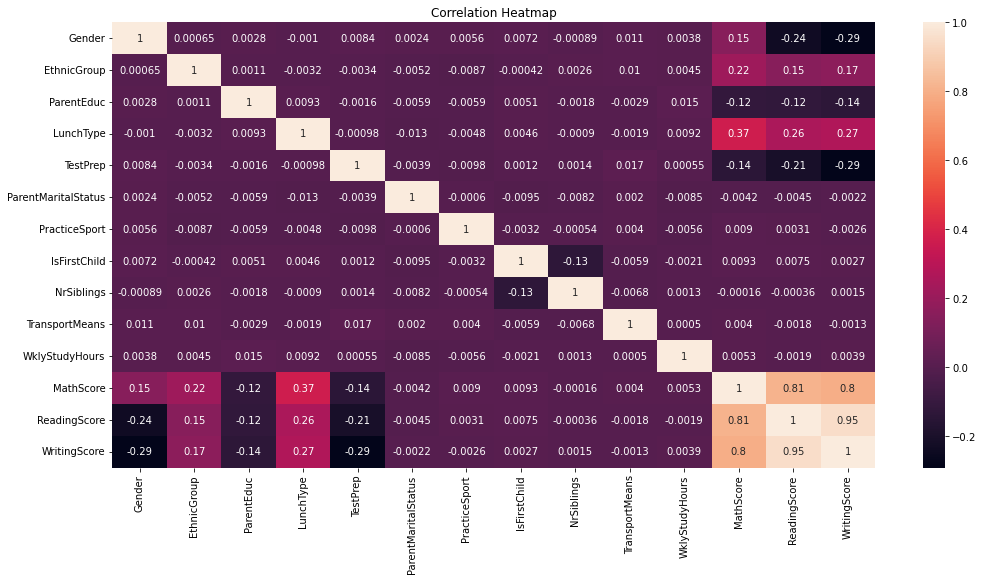

In [ ]:
# Create correlation heatmap to check correlation through each features

correlation = df.corr(method='spearman')

plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True)
plt.tight_layout()
plt.title("Correlation Heatmap")
plt.show()

**Explanation**
- From the heatmap, it can be seen that the MathScore feature is quite strongly correlated with the 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ReadingScore', 'WritingScore' columns, so only these features are used as model input
- Not all features are included as input because features that are irrelevant or have a small contribution to the target variable will not help the model learn well. On the other hand, features like this can increase noise, which actually reduces model performance.

## Step 2. Data Split

In [24]:
# Select features and target variable
X = df[['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ReadingScore', 'WritingScore']]
y = df['MathScore']

# Split data: 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state=42)

# Check the resulting shapes to ensure correct split
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (15244, 7), y_train: (15244,)
x_test: (3811, 7), y_test: (3811,)


## Step 3: Regression using Scikit-Learn

In [25]:
from sklearn.metrics import mean_absolute_error

def mape(y_true, y_pred):
    # Avoid division by 0
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Support Vector Machines', SVR()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Neural Network', MLPRegressor())
]

# Function to evaluate the model
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mape_value = mape(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, mape_value

# Train and evaluate the model
results = []
for name, model in models:
    model.fit(x_train, y_train)
    mse, r2, mape_value = evaluate_model(model, x_test, y_test)
    results.append([name, mse, mape_value, r2])

# Show result in a table
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'MAPE (%)', 'R2 Score'])
display(results_df)

,Model,MSE,MAPE (%),R2 Score
0,Linear Regression,31.712707,7.321235,0.865484
1,K-Nearest Neighbors,53.760157,9.653691,0.771966
2,Support Vector Machines,65.330785,10.953195,0.722887
3,Decision Tree,65.333757,10.505910,0.722874
4,Random Forest,36.559130,7.824719,0.844927
5,AdaBoost,43.382825,8.772359,0.815983
6,Gradient Boosting,29.764506,7.104049,0.873748
7,Neural Network,31.293967,7.300625,0.867261


In [27]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model for ensemble methods
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
adaboost = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1), n_estimators=100, random_state=42)
logistic_regression = LinearRegression()

# Model stacking
estimators = [('random_forest', random_forest), ('adaboost', adaboost), ('logistic_regression', logistic_regression)]
stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Train the stacking model
stacking.fit(x_train, y_train)

# Predict on the test set
y_pred = stacking.predict(x_test)

# Performance evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mape(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')
print(f'MAPE: {mape:.4f}')

Mean Squared Error: 31.1045
R2 Score: 0.8681
MAPE: 7.2580


**Explanation**
- From the several types of regression models that have been tried, the model that produces the lowest loss is Gradient Boosting.
- Gradient Boosting produces an R^2 of 0.87 and a Mean Absolute Percentage Error (MAPE) loss of 7.1% or 0.071.
- R-Square measures how well a regression model can explain the variability of the target data. It ranges from 0 to 1.
- MAPE measures the average prediction error as a percentage of the actual values.

## Step 4. Result Visualization
In this step, the actual value and predicted value of the Gradient Boosting model is visualized using plot.

Mean Squared Error (MSE): 29.7645
R^2 Score: 0.8737


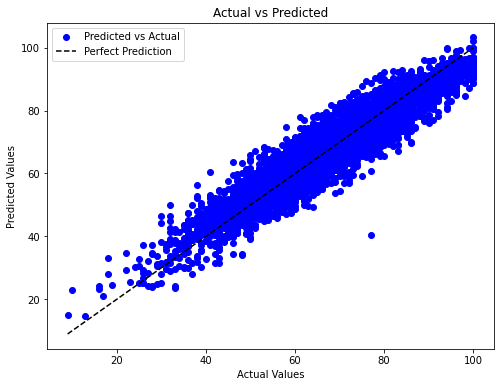

In [33]:
# Train the Neural Network Model
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')


# Actual vs Predicted Plot
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.legend()
    plt.show()

# Visualizing the results
plot_actual_vs_predicted(y_test, y_pred)